<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Residual-Network" data-toc-modified-id="Residual-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Residual Network</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

Ethen 2018-09-02 18:53:57 

CPython 3.6.4
IPython 6.4.0

numpy 1.14.1
pandas 0.23.0
sklearn 0.19.1
matplotlib 2.2.2


# Residual Network

Deep neural networks are difficult to train due to exploding or vanishing gradient problems.

In [2]:
from keras.applications import ResNet50


target_size = 224, 224
input_shape = target_size[0], target_size[1], 3
conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=input_shape)
conv_base.summary()

Using TensorFlow backend.
/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [3]:
from ResNet_CAM import get_ResNet

ResNet_model, all_amp_layer_weights = get_ResNet()

elapsed:  7.635380029678345


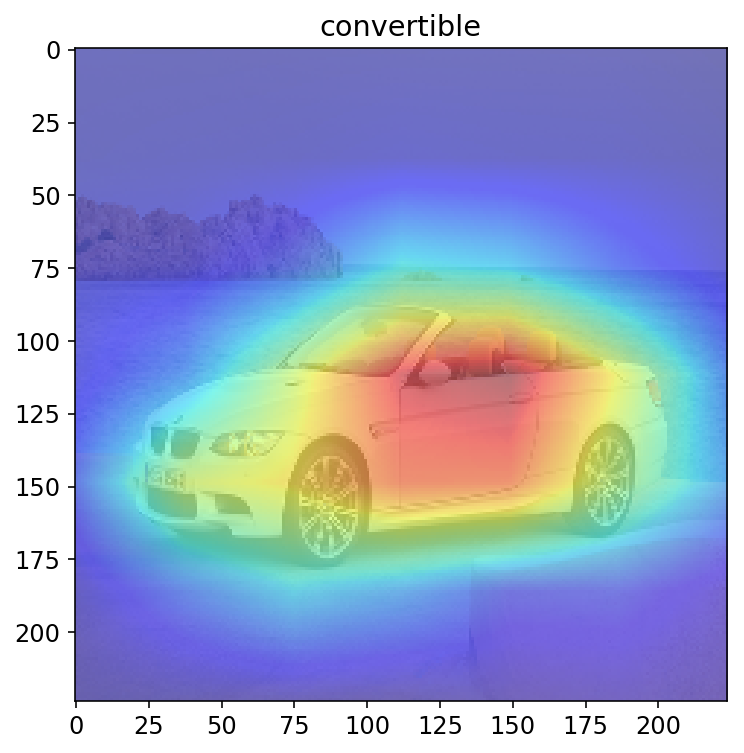

In [4]:
import os
import time
from ResNet_CAM import plot_ResNet_CAM

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# img_path = 'images/dog.png'

img_dir = 'images'
img_path = os.path.join(img_dir, 'bmw.png')
fig, ax = plt.subplots()

start = time.time()
CAM = plot_ResNet_CAM(img_path, ax, ResNet_model, all_amp_layer_weights)
end = time.time()
print('elapsed: ', end - start)
plt.show()

elapsed:  6.429673910140991


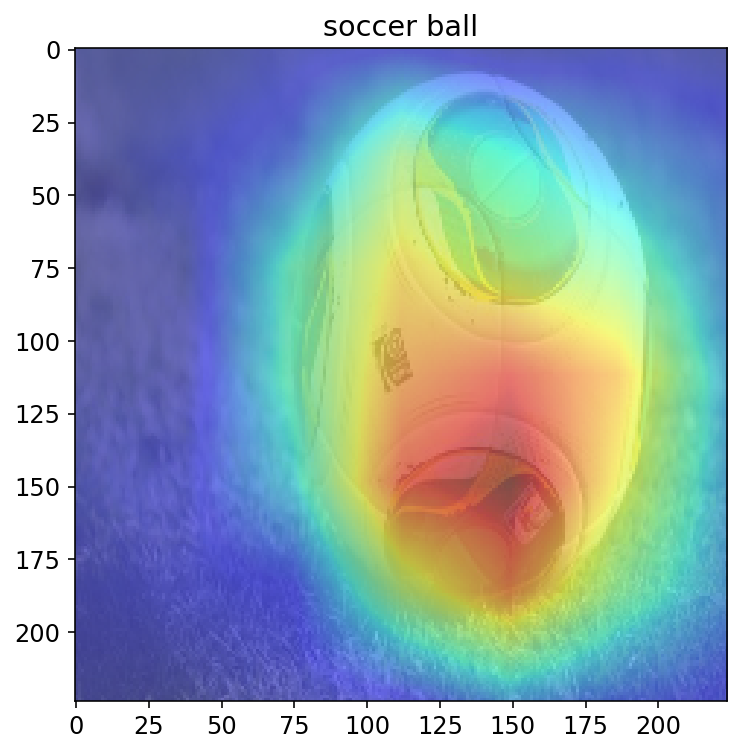

In [6]:
import os
import time
from ResNet_CAM import plot_ResNet_CAM

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# img_path = 'images/dog.png'

img_dir = 'images'
img_path = os.path.join(img_dir, 'soccer_ball.jpg')
fig, ax = plt.subplots()

start = time.time()
CAM = plot_ResNet_CAM(img_path, ax, ResNet_model, all_amp_layer_weights)
end = time.time()
print('elapsed: ', end - start)
plt.show()

elapsed:  6.3865861892700195


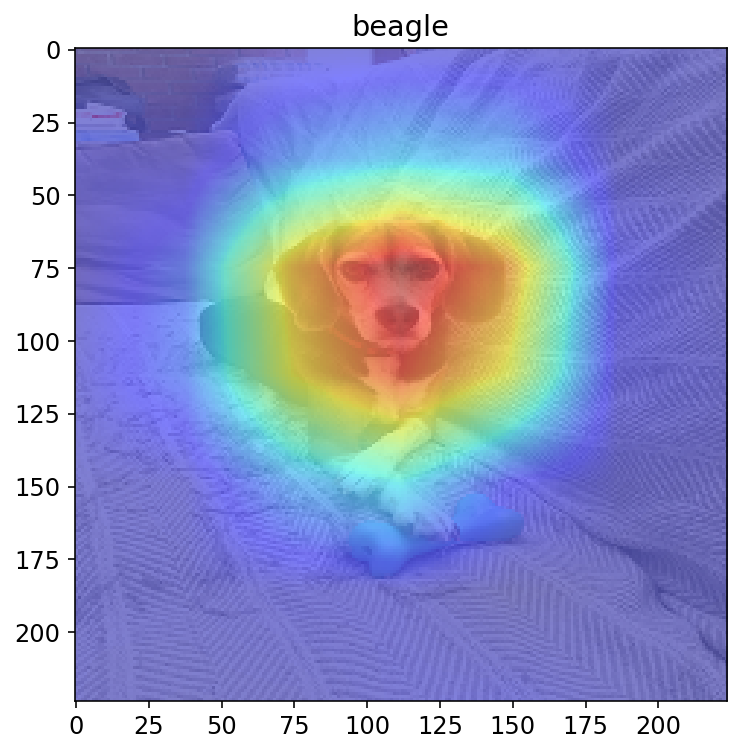

In [7]:
import os
import time
from ResNet_CAM import plot_ResNet_CAM

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# img_path = 'images/dog.png'

img_dir = 'images'
img_path = os.path.join(img_dir, 'jemma.png')
fig, ax = plt.subplots()

start = time.time()
CAM = plot_ResNet_CAM(img_path, ax, ResNet_model, all_amp_layer_weights)
end = time.time()
print('elapsed: ', end - start)
plt.show()

elapsed:  6.302934885025024


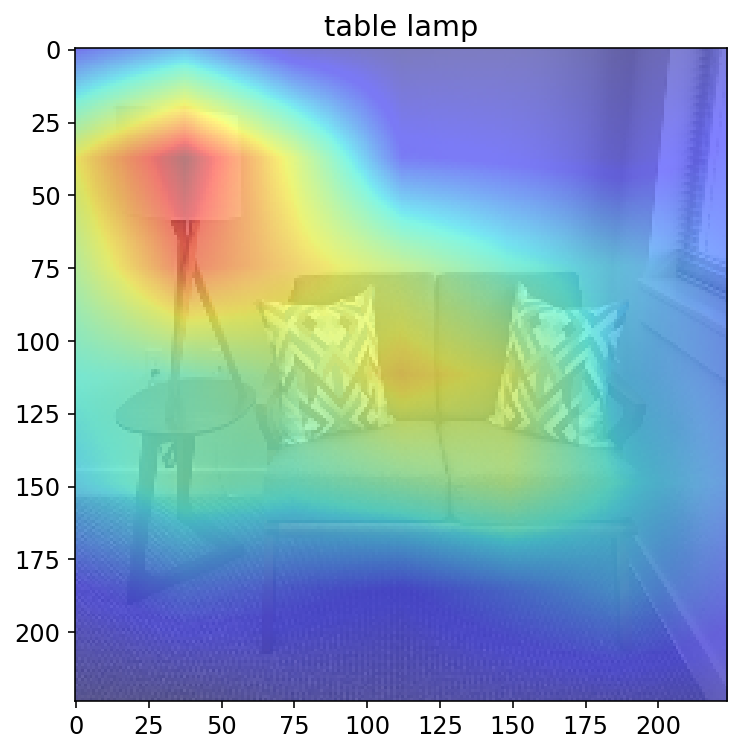

In [8]:
import os
import time
from ResNet_CAM import plot_ResNet_CAM

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# img_path = 'images/dog.png'

img_dir = 'images'
img_path = os.path.join(img_dir, 'office.png')
fig, ax = plt.subplots()

start = time.time()
CAM = plot_ResNet_CAM(img_path, ax, ResNet_model, all_amp_layer_weights)
end = time.time()
print('elapsed: ', end - start)
plt.show()

# Reference

- [Github: Keras Applications](https://github.com/keras-team/keras-applications)
- http://nbviewer.jupyter.org/github/Kulbear/deep-learning-coursera/blob/master/Convolutional%20Neural%20Networks/Residual%20Networks%20-%20v1.ipynb
- http://teleported.in/posts/decoding-resnet-architecture/
- https://www.youtube.com/watch?v=RYth6EbBUqM&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=15
- https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
- https://alexisbcook.github.io/2017/using-transfer-learning-to-classify-images-with-keras/
- https://alexisbcook.github.io/2017/global-average-pooling-layers-for-object-localization/